### 分类问题
- 准确率
- 精确率
- 召回率
- F1分数
- AUC
- 对数损失(Log loss)
- k精确率(P@k)
- k平均精确率(AP@k)
- k均值平均精确率(MAP@k)

### 回归问题
- 平均绝对误差(MAE)
- 均方差(MSE)
- 均方根差(RMSE)
- 均方根对数差(RMSLE)
- 平均百分比误差(MPE)
- 平均绝对百分比误差(MAPE)
- $R^2$

选取什么指标与目标有关,与数据无关

在二元分类指标中,当正负样本数量相等时,通常使用准确率,精确率,召回率和F1

In [19]:
## 准确率
def accuracy(y_true, y_pred):
    # 为正确预测数初始化一个简单计数器
    correct_counter = 0
    # 遍历y_true, y_pred中所有元素
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(y_true)

In [20]:
# 使用scikit-learn计算准确率
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(metrics.accuracy_score(l1, l2))

0.625


偏斜数据集,也就是说,一个类别中的样本数量比另一个类别中的样本数量多很多.

在这种情况下,使用准确率作为评估指标是不可取的,因为它不能代表数据.

真阳性(True Positive)
真阴性(True Negative)
假阳性(False Positive)
假阴性(False Negative)

In [13]:
def true_positive(y_true, y_pred):
    # 初始化真阳性样本计数器
    tp = 0
    # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
        # 若真实标签为正类且预测标签也为正类，计数器增加
        if yt == 1 and yp == 1:
            tp += 1 
    # 返回真阳性样本数
    return tp

def true_negative(y_true, y_pred):
    # 初始化真阴性样本计数器
    tn = 0
    # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
        # 若真实标签为负类且预测标签也为负类，计数器增加
        if yt == 0 and yp == 0:
            tn += 1 
    # 返回真阴性样本数
    return tn

def false_positive(y_true, y_pred):
    # 初始化假阳性计数器
    fp = 0
    # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
        # 若真实标签为负类而预测标签为正类，计数器增加
        if yt == 0 and yp == 1:
            fp += 1 
    # 返回假阳性样本数
    return fp

def false_negative(y_true, y_pred):
    # 初始化假阴性计数器
    fn = 0
    # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
        # 若真实标签为正类而预测标签为负类，计数器增加
        if yt == 1 and yp == 0:
            fn += 1 
    # 返回假阴性数
    return fn

以上方法只适用于二元分类
用以上术语定义准确率,可以写为:

$AccuracyScore = (TP + TN)/(TP + TN + FP + FP + FN)$

In [17]:
def accuracy_v2(y_true, y_pred):
    # 真阳性样本数
    tp = true_positive(y_true, y_pred)
    # 假阳性样本数
    fp = false_positive(y_true, y_pred)
    # 假阴性样本数
    fn = false_negative(y_true, y_pred)
    # 真阴性样本数
    tn = true_negative(y_true, y_pred)
    # 准确率
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

In [21]:
print(accuracy(l1, l2))
print(accuracy_v2(l1, l2))
print(metrics.accuracy_score(l1, l2))

0.625
0.625
0.625


精确率:在识别阳性样本时有多少正确率

$Precision = TP / (TP + FP)$

In [23]:
def precision(y_true, y_pred):
    # 真阳性样本数
    tp = true_positive(y_true, y_pred) 
    # 假阳性样本数
    fp = false_positive(y_true, y_pred)
    # 精确率
    precision = tp / (tp + fp)
    return precision

In [24]:
print(precision(l1, l2))

0.6666666666666666


召回率:识别了多少阳性样本

$Recall = TP / (TP + FN)$

In [26]:
def recall(y_true, y_pred):
    # 真阳性样本数
    tp = true_positive(y_true, y_pred) 
    # 假阴性样本数
    fn = false_negative(y_true, y_pred) 
    # 召回率
    recall = tp / (tp + fn)
    return recall

In [27]:
print(recall(l1, l2))

0.5


对于一个好的模型而言,精确率和召回率都应该很高
F1分数时精确率和召回率的综合指标,并定义为精确率和召回率的简单加权平均值,

$F1 = 2PR / (P + R)$

$F1 = 2TP / (2TP + TP + FN)$

In [29]:
def f1(y_true, y_pred):
    # 计算精确率
    p = precision(y_true, y_pred) 
    # 计算召回率
    r = recall(y_true, y_pred)
    # 计算f1值
    score = 2 * p * r / (p + r) 
    return score

In [32]:
metrics.f1_score(l1, l2)

0.5714285714285715

In [33]:
f1(l1,l2)

0.5714285714285715

TPR(真阳性率)跟Recall相同,FPR(False Positive Rate)

In [34]:
def fpr(y_true, y_pred):
    # 假阳性样本数
    fp = false_positive(y_true, y_pred) 
    # 真阴性样本数
    tn = true_negative(y_true, y_pred) 
    # 返回假阳性率（FPR）
    return fp / (tn + fp)

In [36]:
def tpr(y_true, y_pred):
    # 真阳性率（TPR），与召回率计算公式一致
    return recall(y_true, y_pred)

In [39]:
# 初始化真阳性率列表
tpr_list = [] 

# 初始化假阳性率列表
fpr_list = []

# 真实样本标签
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# 预测样本为正类（1）的概率
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# 预测阈值
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# 遍历预测阈值
for thresh in thresholds:
    # 若样本为正类（1）的概率大于阈值，为1，否则为0
    temp_pred = [1 if x >= thresh else 0 for x in y_pred] 
    # 真阳性率
    temp_tpr = tpr(y_true, temp_pred)
    # 假阳性率
    temp_fpr = fpr(y_true, temp_pred)
    # 将真阳性率加入列表
    tpr_list.append(temp_tpr) 
    # 将假阳性率加入列表
    fpr_list.append(temp_fpr)

In [56]:
temp_pred = [1 if x >= 0 else 0 for x in y_pred]
temp_pred
y_true
fpr(y_true, temp_pred)
tpr(y_true, temp_pred)
true_positive(y_true, temp_pred)

5

In [45]:
print(tpr_list)
print(fpr_list)

[1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]
[1.0, 0.9, 0.7, 0.6, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'tpr')

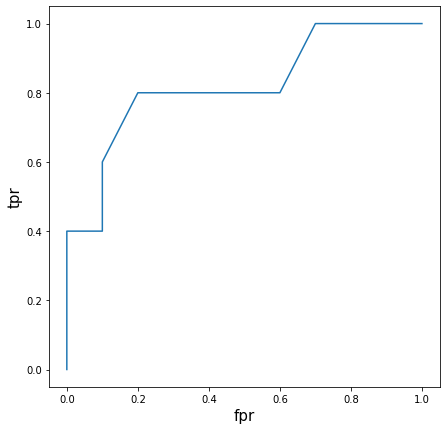

In [57]:
plt.figure(figsize=(7,7))
plt.plot(fpr_list, tpr_list)
plt.xlabel('fpr', fontsize=15)
plt.ylabel('tpr', fontsize=15)

In [ ]:
ROC曲线,计算这条ROC曲线下的面积,就是在计算AUC,当数据集的二元目标倾斜时,这个指标非常有用

ROC曲线线下面积(Area Under ROC Curve or Area Under Curve),简称AUC

In [60]:
from sklearn import metrics

# 真实样本标签
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# 预测样本为正类（1）的概率
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC是业内广泛应用于偏斜二元分类任务的指标,一旦理解了AUC背后的理念,也就更容易向业界可能回评估您的模型的非技术人员解释它

如果不希望有太多的FP(假阳),阈值就应该高一些,不过这也会带来更多的FN(假阴)